In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

%matplotlib inline
import matplotlib.pyplot as plt

# Arrival Delays

In [2]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

In [3]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Regression

In [4]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

In [5]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.654193995146565
Mean Squared Error: 176.37353876761964
R-squared: 0.9940853862137997


## With Training Techniques

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .....................C=1, epsilon=10, ke

In [8]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

In [9]:
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.46243409088345
Mean Squared Error: 175.64679260400743
R-squared: 0.9941097573462746


## XG Boost

In [10]:
# Split Data into train, test and validation
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
)

param_grid = {
    "n_estimators": [600, 1000, 1400],    # pair with learning_rate below
    "learning_rate": [0.03, 0.1],
    "max_depth": [4, 6],
    "min_child_weight": [1, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "reg_lambda": [1.0, 3.0],            # optional but often useful
}

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # or "neg_mean_absolute_error"
    cv=5,
    n_jobs=-1,
    verbose=2,
)

grid.fit(X_train, y_train)



Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.03, 0.1], 'max_depth': [4, 6],
                         'min_child_weight': [1, 5],
                         'n_estimators': [600, 1000, 1400],
                         'reg_lambda': [1.0, 3.0], 'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [12]:
best_params = grid.best_params_

print(best_params)

xgb_model= XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False,
)

{'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 600, 'reg_lambda': 3.0, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=-1, num_parallel_tree=None, ...)

In [13]:
# Evaluation on Test Set
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.421336041267859
Mean Squared Error: 279.1560154601633
R-squared: 0.9908938098850302


# Bike Sharing Demand

In [14]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [15]:
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

x = df[features].copy()
y = df[target].astype(float)

## Original Approach

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear',  'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   1.5s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   1.5s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   1.5s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   1.4s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   1.5s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   2.4s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   1.4s
[CV] END .....................C=1, epsilon=10, ke

In [18]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 79.97929783472864
Mean Squared Error: 16547.57171206858
R-squared: 0.47742438788353325


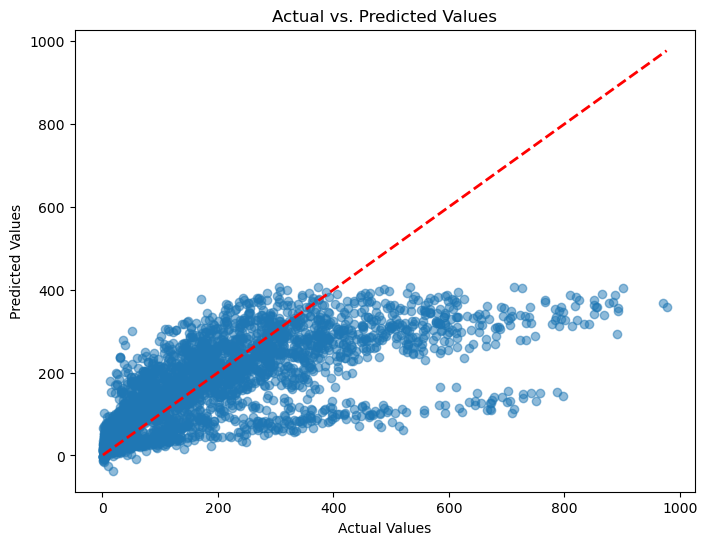

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## XG Boost

In [21]:
# Split Data into train, test and validation
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
)

param_grid = {
    "n_estimators": [600, 1000, 1400],    # pair with learning_rate below
    "learning_rate": [0.03, 0.1],
    "max_depth": [4, 6],
    "min_child_weight": [1, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "reg_lambda": [1.0, 3.0],            # optional but often useful
}

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # or "neg_mean_absolute_error"
    cv=5,
    n_jobs=-1,
    verbose=2,
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("CV best RMSE:", -grid.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=600, reg_lambda=1.0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree

In [23]:
best_params = grid.best_params_

print(best_params)
xgb_model= XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False,
)

{'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 1400, 'reg_lambda': 3.0, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1400,
             n_jobs=-1, num_parallel_tree=None, ...)

In [24]:
# Evaluation on Test Set
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 24.237710175915016
Mean Squared Error: 1563.855267850441
R-squared: 0.9492326098360565


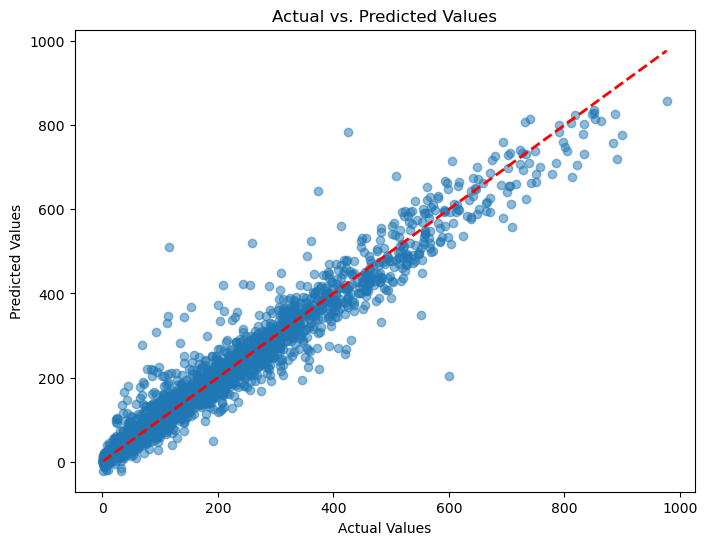

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()